## Means Testing

#### A Note on the Central Limit Theorem

If you have a population (regardless of distribution) with mean μ and take sufficiently large random samples (usually N > 30 [for each independent sample]) from the population, then the distribution of the sample means will be approximately normally distributed

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [2]:
# simulate rolling a virtual die

### Distribution of sample means 
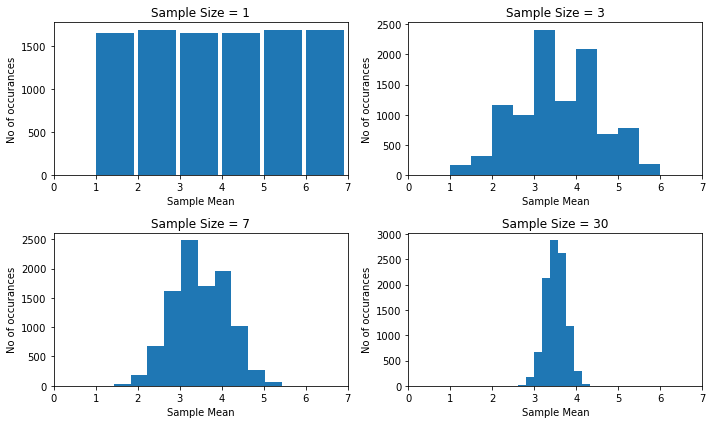

# Comparing Means


_______________________________________________________________________

|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*||  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: scipy.stats.ttest_1samp|Normally Distributed\*\*||   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): scipy.stats.ttest_ind|Independent, Normally Distributed\*\*, Equal Variances\*\*\*||   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: scipy.stats.f_oneway|Independent, Normally Distributed\*\*, Equal Variances**||   

\*If assumptions can't be met, the equivalent non-parametric test can be used.  
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption.   

## One Sample T-Test

Goal: Compare observed mean to theoretical one. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} = \mu_{th}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{obs} != \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly smaller)|$H_{a}$|$\mu_{obs} < \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly larger)|$H_{a}$|$\mu_{obs} > \mu_{th}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  

5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`. 

6. Decide. **For a 2-tailed test, we take the p-value as is. For a 1-tailed test, we evaluate $p/2 < \alpha$ and $t > 0$ (to test if higher), and of a less-than test when $p/2 < \alpha$ and $t < 0$.**

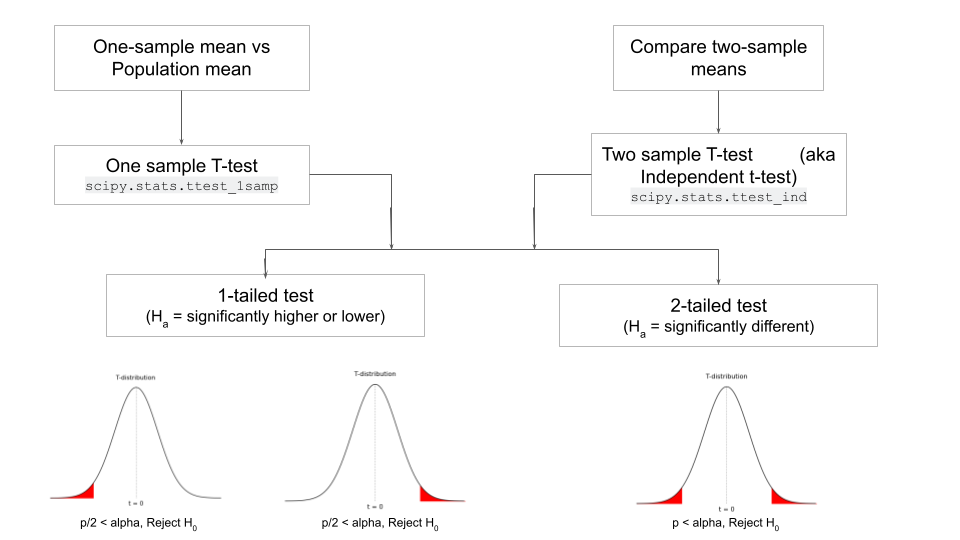

- t-statistic == 0 means no difference is means (i.e null hypothesis is true)
- Only when t-statistic is larger enough (positive or negative) we are confident that means are different enough to reject null

In [3]:
mpg= data('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [4]:
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [5]:
mpg.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


- auto trans have diff hwy mpg than manual   or 
- older cars have lower city mpg than new cars    or
- displ of older cars is diff from all cars

### H$_o$
### H$_a$

## ONE SAMPLE T-TEST

In [6]:
# DSPLCAEMENT
# 1999-OLD
# 2008-NEW

# H$_o$:  ALL CARS HAVE SIMILAR DISPLACEMENT VALUES, NO STATISTICALLY SIG DIFF EXISTS
# Ha: MEAN DISPL OF 1999 VeHICLES IS DIFF FROM  MEAN OF ALL

DETEREMINE TEST:
    
    - Compare 1999 vehicles to all

     - 1 sample test
    
    - We compare mean of 1999 vehicles to all vehicles.... 2-tailed test

In [7]:
mpg_1999_df = mpg[mpg['year'] == 1999]
mpg_1999_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
12,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact
13,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25,p,compact
16,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize
22,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv


(array([25., 18., 21., 10., 15.,  2., 10.,  9.,  6.,  1.]),
 array([1.6 , 2.09, 2.58, 3.07, 3.56, 4.05, 4.54, 5.03, 5.52, 6.01, 6.5 ]),
 <BarContainer object of 10 artists>)

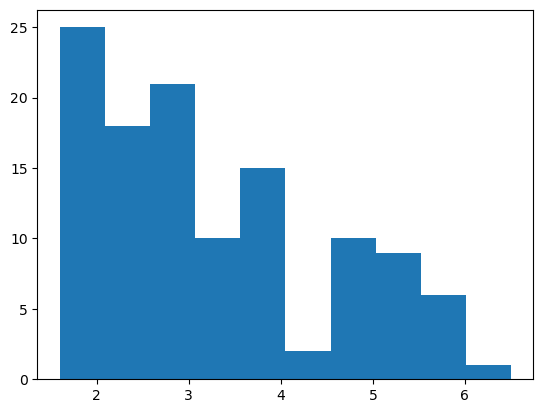

In [8]:
plt.hist(mpg_1999_df.displ)

In [9]:
mpg_1999_df.displ.describe()

count    117.000000
mean       3.281197
std        1.260058
min        1.600000
25%        2.200000
50%        3.000000
75%        4.000000
max        6.500000
Name: displ, dtype: float64

In [10]:
mpg.displ.describe()

count    234.000000
mean       3.471795
std        1.291959
min        1.600000
25%        2.400000
50%        3.300000
75%        4.600000
max        7.000000
Name: displ, dtype: float64

In [11]:
μ1999 = mpg_1999_df.displ.mean()
μth = mpg.displ.mean()
μth

3.4717948717948697

In [12]:
α = 0.05

In [13]:
mpg_1999_df.displ.describe()

count    117.000000
mean       3.281197
std        1.260058
min        1.600000
25%        2.200000
50%        3.000000
75%        4.000000
max        6.500000
Name: displ, dtype: float64

In [14]:
# ACTUALLY DO THE TEST NOW
#args: 
# first the sample of mpg where mpg == 1999
# 
stats.ttest_1samp(mpg_1999_df.displ,μth)

Ttest_1sampResult(statistic=-1.6361431738775498, pvalue=0.10452008593170263)

In [15]:
stats.ttest_1samp(mpg.displ,μth)

Ttest_1sampResult(statistic=3.154864114245929e-14, pvalue=0.9999999999999749)

In [16]:
t_stat, p_val = stats.ttest_1samp(mpg_1999_df.displ,μth)
p_val

0.10452008593170263

In [17]:
p_val < α

False

#### OLDER CARS LOWER CITY MPG THAN NEW

In [18]:
# SET Ho and Ha
# SET CL and alpha
# 1 or 2 sample?
# 1 or 2 tailed?

H$_o$: 1999 vics are the same or greter than 2008

H$_a$: 1999 vics have mean city mpg that is lower than 2008 mean city mpg

In [19]:
# Ttest INDEPENDENT with ONE tail

mpg_1999_df = mpg[mpg['year'] == 1999]
mpg_1999_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


In [20]:
# Ttest INDEPENDENT with ONE tail

mpg_2008_df = mpg[mpg['year'] == 2008]
mpg_2008_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact


(array([23., 25., 36., 11., 11.,  6.,  1.,  2.,  0.,  2.]),
 array([11. , 13.4, 15.8, 18.2, 20.6, 23. , 25.4, 27.8, 30.2, 32.6, 35. ]),
 <BarContainer object of 10 artists>)

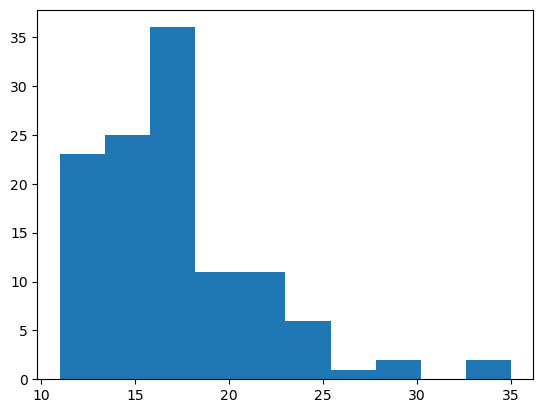

In [21]:
plt.hist(mpg_1999_df.cty)

(array([ 5., 12., 24., 17., 16., 20., 16.,  3.,  3.,  1.]),
 array([ 9. , 10.9, 12.8, 14.7, 16.6, 18.5, 20.4, 22.3, 24.2, 26.1, 28. ]),
 <BarContainer object of 10 artists>)

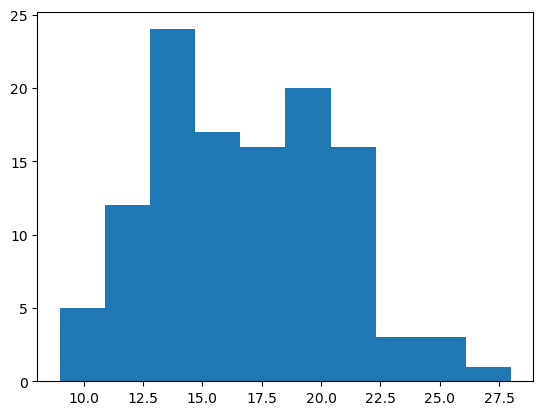

In [22]:
plt.hist(mpg_2008_df.cty)

In [23]:

mpg_1999_df.cty.describe()

count    117.000000
mean      17.017094
std        4.458589
min       11.000000
25%       14.000000
50%       17.000000
75%       19.000000
max       35.000000
Name: cty, dtype: float64

In [24]:
mpg_2008_df.cty.describe()

count    117.000000
mean      16.700855
std        4.056211
min        9.000000
25%       13.000000
50%       17.000000
75%       20.000000
max       28.000000
Name: cty, dtype: float64

In [25]:

μ1999_cty = mpg_1999_df.cty
μ2008_cty = mpg_2008_df.cty

(array([23., 25., 36., 11., 11.,  6.,  1.,  2.,  0.,  2.]),
 array([11. , 13.4, 15.8, 18.2, 20.6, 23. , 25.4, 27.8, 30.2, 32.6, 35. ]),
 <BarContainer object of 10 artists>)

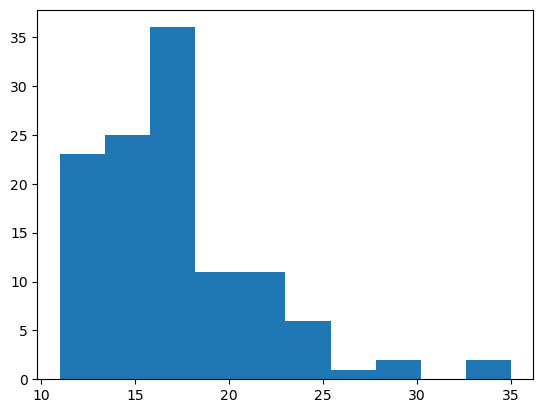

In [26]:
plt.hist(mpg_1999_df.cty)

In [27]:
# lets check some other measures of variance
# Ho: 1999 have equal variance in cty mpgto 2008 cars
# Ha 199 have dfifferent variance
sub_alpha = 0.05
stats.levene(mpg_1999_df.cty,mpg_2008_df.cty)

# THIS IS IN REPLY TO EQUAL VARIANCE LEVENE FOR VARIANCE
# THS will determine if a diff exists with respect to the variances of each sample

LeveneResult(statistic=0.030273333475361427, pvalue=0.8620232104333374)

### Be mindful when you feed aregs into ttest_ind when you have 0ne-tailed test! term a will be evaluated
### as < term b

In [28]:
t_stat, p_val = stats.ttest_ind(mpg_1999_df.cty,
                mpg_2008_df.cty,
                equal_var=True) #a < b t-stat will be negative

In [29]:
t_stat

0.5674988409997608

In [30]:
p_val

0.5709240495406107

In [31]:
p_val < α

False

### AUTOmatic trans  and manual trans difference exists hwy milegae

2 sample t-test 2-tailed b/c testing for diff exists

In [32]:
# test_ind: b/c 2 or more saple t-test
# NoRMal?
# VARIANCE equal ie randomness?
# Independent?


In [33]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [34]:
mpg['auto_trans'] = mpg.trans.str.startswith('auto')
mpg.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,auto_trans
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,True
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,False
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,True
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,False
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,True
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,False


In [35]:
mpg_auto_df = mpg[mpg.auto_trans == True]
mpg_auto_df.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,auto_trans
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,True
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,True
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,True
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact,True
12,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact,True
14,audi,a4 quattro,3.1,2008,6,auto(s6),4,17,25,p,compact,True
16,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize,True
17,audi,a6 quattro,3.1,2008,6,auto(s6),4,17,25,p,midsize,True


In [36]:
# compare: hwy of auto and hwy of manual
auto_hwy = mpg[mpg.auto_trans == True].hwy
manual_hwy = mpg[mpg.auto_trans == False].hwy


In [37]:
mpg_auto_df.trans.value_counts()

auto(l4)    83
auto(l5)    39
auto(s6)    16
auto(l6)     6
auto(av)     5
auto(s5)     3
auto(s4)     3
auto(l3)     2
Name: trans, dtype: int64

In [38]:
auto_hwy.describe()

count    157.000000
mean      22.292994
std        5.623054
min       12.000000
25%       17.000000
50%       22.000000
75%       26.000000
max       41.000000
Name: hwy, dtype: float64

In [39]:
manual_hwy.describe()

count    77.000000
mean     25.779221
std       5.961772
min      12.000000
25%      23.000000
50%      26.000000
75%      29.000000
max      44.000000
Name: hwy, dtype: float64

Ho: There is no diff in hwy between auto and man

Ha:  There is diff in hwy between auto and man

In [40]:
# check for variance(not really randomness)
#arg order does not matter for LEVENE
# set up Ho and Ha for LEVENE check for RANDMNESS or VARIANCE
_, levene_p = stats.levene(auto_hwy,manual_hwy)
levene_p < α

#CANNOT REJECT presume equivalent variance

False

In [41]:
auto_hwy.size, manual_hwy.size

(157, 77)

(array([ 6., 38., 28., 13., 37., 21.,  9.,  2.,  2.,  1.]),
 array([12. , 14.9, 17.8, 20.7, 23.6, 26.5, 29.4, 32.3, 35.2, 38.1, 41. ]),
 <BarContainer object of 10 artists>)

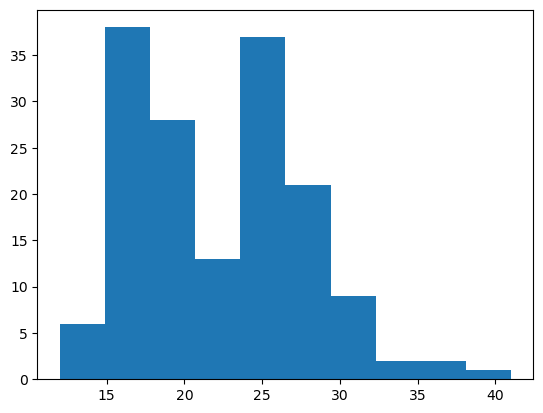

In [42]:
plt.hist(auto_hwy)

(array([ 1., 11.,  5.,  8., 22., 22.,  4.,  2.,  0.,  2.]),
 array([12. , 15.2, 18.4, 21.6, 24.8, 28. , 31.2, 34.4, 37.6, 40.8, 44. ]),
 <BarContainer object of 10 artists>)

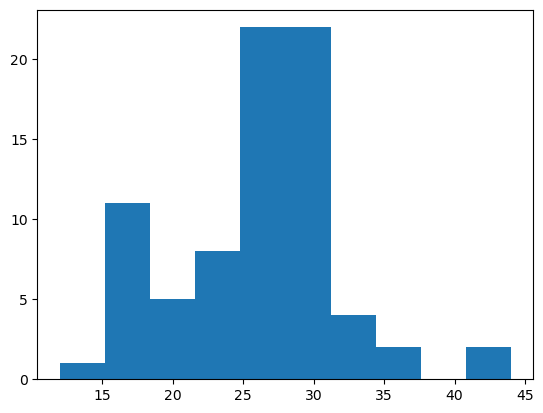

In [43]:
plt.hist(manual_hwy)

In [44]:
# ok ACTUAL TEST NOW!!!!

t_stat, p_val = stats.ttest_ind(manual_hwy,
                                auto_hwy,
                               equal_var=True)

In [45]:
t_stat

4.368349972819688

In [46]:
p_val

1.888044765552951e-05

In [47]:
p_val < α

True

In [48]:
t_stat

4.368349972819688

In [49]:
# LETS Reconstruct this now
# Ho: NO SIG DIFF EXISTS
# Ha: Manual hwy is GREATER THAN
# BUT now it is 2 sample ONE TAIL TEST!!!

t_stat, p_val = stats.ttest_ind(manual_hwy,
                                auto_hwy,
                               equal_var=True)

In [50]:
(p_val / 2)

9.440223827764755e-06

In [51]:
(p_val / 2) < α

True

In [52]:
# both need to be true to reject null
((p_val / 2) < α) and (t_stat > 0)

# NOW WE are suggesting a Directional difference

True

### Pearsons R

In [53]:
#vectorized operations and stuff
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [54]:
swiss = data('swiss')

In [55]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [56]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


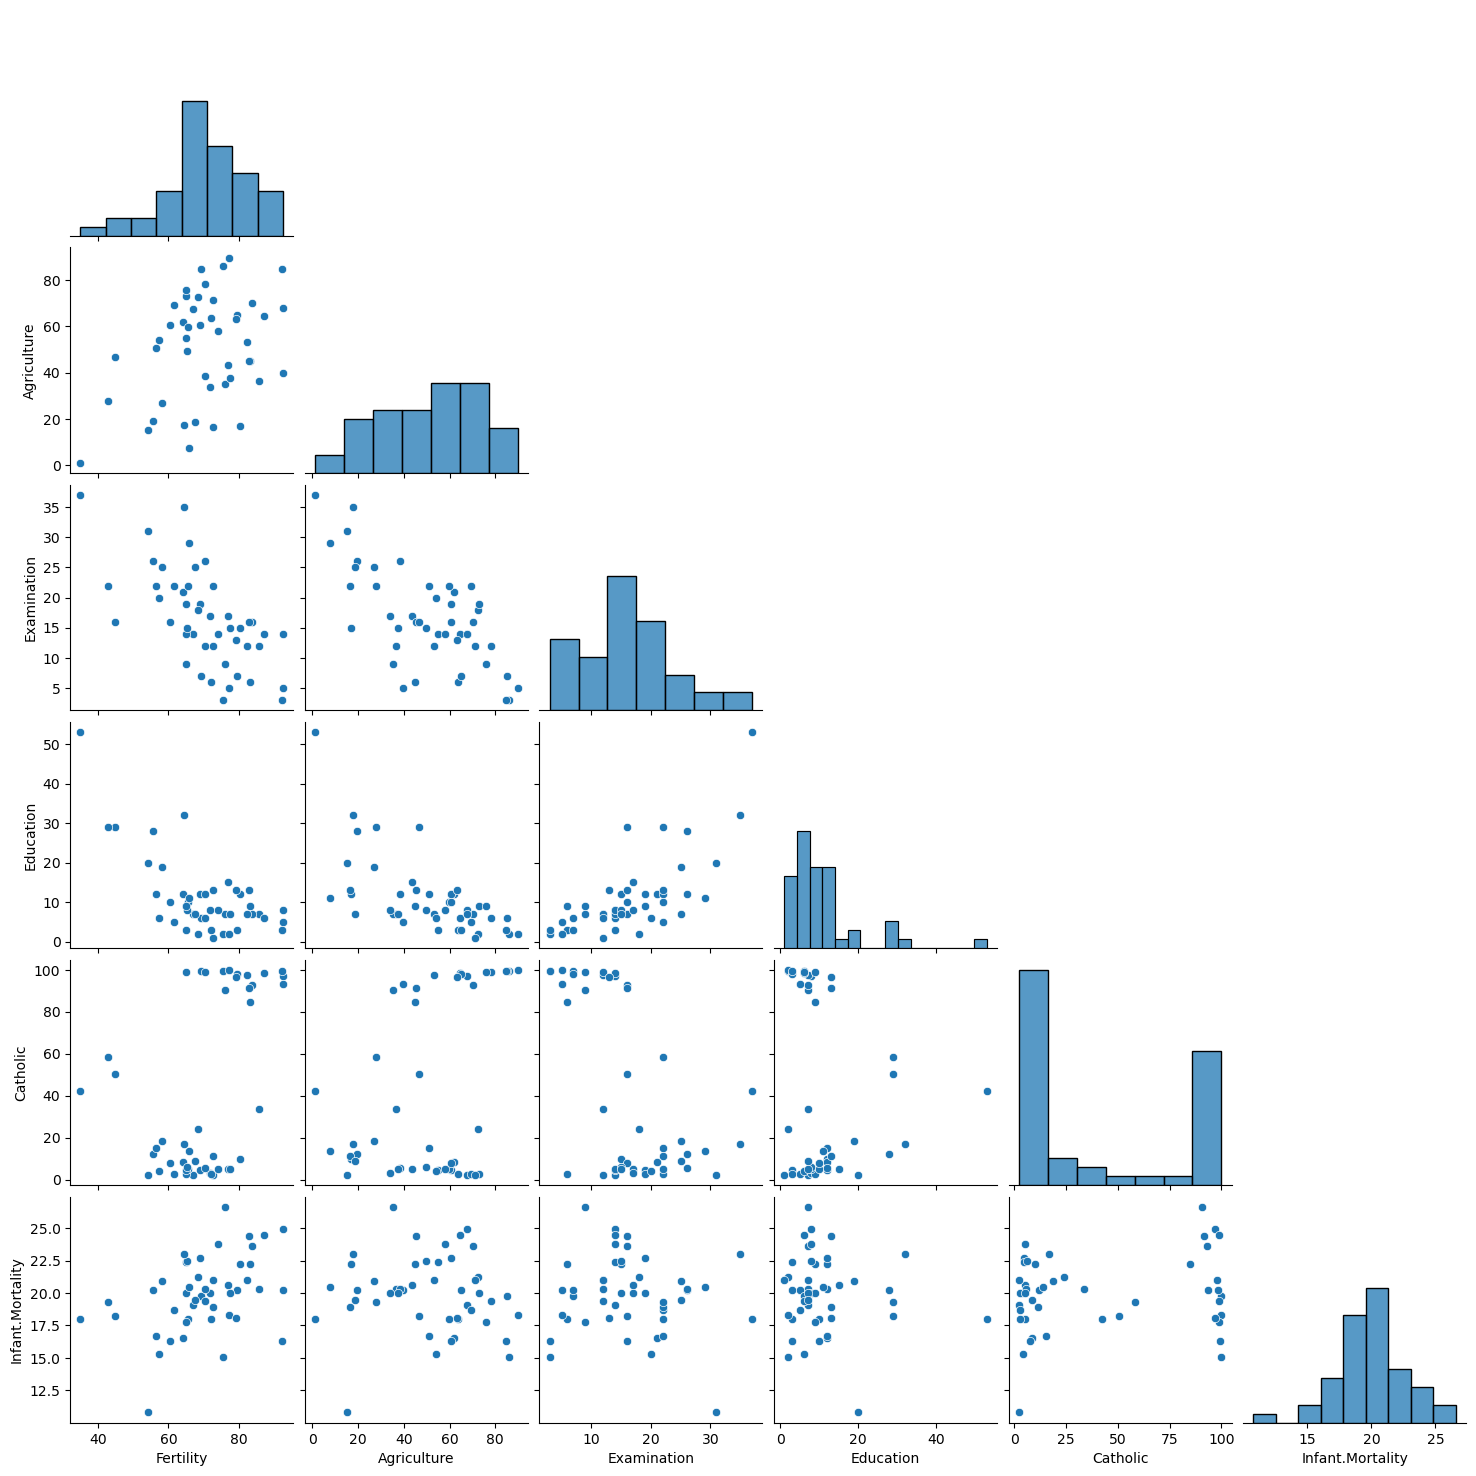

In [57]:
sns.pairplot(swiss, corner=True)
plt.show()

In [ ]:
# fertility v exam
# agri v exam


H$_o$ : No linear relationship exists between fert and edu

H$_a$ : A linear relationship exists between fert and edu

In [58]:
fert = swiss.Fertility
exam = swiss.Examination

In [63]:
r,p = stats.pearsonr(fert,exam)
r,p

(-0.6458827064572875, 9.450437340690438e-07)

In [61]:
# confidence level : 0.95
check_α = 0.05

In [62]:
p < check_α # We can REJECT the null...ie a linear relationship exists

True

In [69]:
# fertility v exam
# agri v exam


H$_o$ : No linear relationship exists between agri and edu

H$_a$ : A linear relationship exists between agri and edu

In [66]:
agri = swiss.Agriculture
exam = swiss.Examination

In [70]:
r,p = stats.pearsonr(agri,exam)
r,p

(-0.6865422086171364, 9.951515271339796e-08)

In [71]:
p < check_α # We can REJECT the null...ie a linear relationship exists

True

### CHI$^2$

In [72]:
mpg = data('mpg')

In [ ]:
# We want to see if multiple variables (categorical) are independent of one another

In [77]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,auto
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,1
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,1
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,1


In [76]:
mpg['auto'] = mpg.trans.str.startswith('aut').astype(int)

In [78]:
pd.crosstab(mpg['year'],mpg['auto'], margins=True)

auto,0,1,All
year,,,
1999,43,74,117
2008,34,83,117
All,77,157,234


In [79]:
pd.crosstab(mpg['year'],mpg['auto'], margins=True,normalize=True).round(3)

auto,0,1,All
year,,,
1999,0.184,0.316,0.5
2008,0.145,0.355,0.5
All,0.329,0.671,1.0


In [ ]:
# will create a table of observed values to test for Chi2 stat and p-value

In [84]:
observed = pd.crosstab(mpg['year'],mpg['auto'])
observed

auto,0,1
year,,
1999,43,74
2008,34,83


H$_o$ : The variables of YEAR and TRANS-TYPE are independent of one another

H$_a$ : There is dependency between vehicle YEAR and TRANS-TYPE

In [85]:
stats.chi2_contingency(observed)

(1.2388121432707422,
 0.2657001056392438,
 1,
 array([[38.5, 78.5],
        [38.5, 78.5]]))

#### Chi-Square calcs the diff between and observed and expected 
- we feed observed values into a pd.crosstab
- When we call stats.chi2_contingency on observed, we get the expected DF as part of our output

In [90]:
chi2,p,dof,exp_val = stats.chi2_contingency(observed)

In [91]:
p

0.2657001056392438

In [92]:
p < check_α

False

In [87]:
mpg.year.value_counts(normalize=True)

1999    0.5
2008    0.5
Name: year, dtype: float64

In [88]:
mpg.auto.value_counts(normalize=True)

1    0.67094
0    0.32906
Name: auto, dtype: float64

In [89]:
mpg.shape

(234, 12)